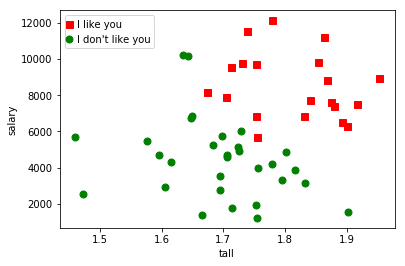

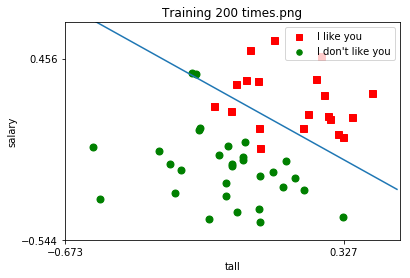

Cost theta: [[0.48518509]]
Train Accuracy: 0.88
finished!


In [2]:
# -*- coding: UTF-8 -*-
 #numpy库的使用，请参考：https://www.jianshu.com/p/a260a8c43e44
 #matplotlib库请参考：https://matplotlib.org/api/index.html

import xlrd     # 导入必备的 xlrd 库，目的是为了调用 xlrd.open_workbook 函数打开 excel 文件，读取数据
import matplotlib.pyplot as plt     # 导入必备的 matplotlib 库，并且将其中的 matplotlib.pyplot 重名为 plt, 目的是为了后续的绘图需要，也是为了编程方便，简写为 plt
import numpy as np      # 导入必备的 numpy 库，并且将其重名为 np, 目的是为了后续的矩阵的定义、运算、操作等，也是为了编程方便，简写为 np

# 定义函数loadData函数，输入参数是 filename 指代文件名，返回数据data，目的是从.xls文件中加载数据，并存储为numpy中的array格式
def loadData(filename):
    workbook = xlrd.open_workbook(filename)         # 通过调用 xlrd.open_workbook 函数打开 excel 文件，读取数据，并返回给 workbook 变量
    boyinfo = workbook.sheet_by_index(0)            # 通过使用属性 sheet_by_index 得到  excel 文件 中的工作簿，其中 sheet_by_index(0) 表示是第一个工作簿，在 python 中，下标从 0 开始
    col_num = boyinfo.ncols                         # 通过使用属性 ncols 得到 excel 文件 中第一个工作簿的 列数，并赋值给 col_num
    row_num = boyinfo.nrows                         # 通过使用属性 nrows 得到 excel 文件 中第一个工作簿的 行数，并赋值给 row_num
    col0 = boyinfo.col_values(0)[1:]                # 通过使用属性 col_values(0)[1:] 得到 excel 文件 中第一列数据中，从第2行到最后一行的所有数据，并赋值给 col0
    data = np.array(col0)                           # 通过使用 np.array 函数， 将 col0 转换成数组，并赋值给 data
    if col_num == 1:                                # 条件判断语句： 如果列数 col_num 为1， 只有一列，那么直接返回数据 data
        return data                                     # 返回data
    else:                                           # 否则，如果不止一列数据，需要遍历所有列的数据
        for i in range(col_num-1):                      # 通过使用for循环达到遍历的目的
            coltemp = boyinfo.col_values(i+1)[1:]           # 从第二行开始，表头不算，遍历从 第二列 开始到最后一列的数据
            data = np.c_[data, coltemp]                     # 通过使用 np.c_ 函数将 第一列的数据 和后面 所有列的数据组合起来，并赋值给 data
    return data                                     # 返回data

# 定义一个 plotData 函数，输入参数是 数据 X 和标志 flag: y，返回作图操作 plt, p1, p2 ， 目的是为了画图
def plotData(X, y):
    pos = np.where(y==1)                            # 通过使用 np.where 函数查找所有满足条件的数据，查找所有满足标志 y == 1 的数据，并赋值给 pos
    neg = np.where(y==0)                            # 通过使用 np.where 函数查找所有满足条件的数据，查找所有满足标志 y == 0 的数据，并赋值给 neg
    # 通过使用 plt.plot 函数作图，对所有满足标志 y == 1 的数据作图，点采用 s (正方形)，代表 square, 点的大小为 7 单位，颜色为 红色 red
    p1 = plt.plot(X[pos, 0], X[pos, 1], marker='s', markersize=7, color='red')[0]
    # 请补全 通过使用 plt.plot 函数作图，对所有满足标志 y == 0 的数据作图，点采用 o (圆形)，代表 circle, 点的大小为 7 单位，颜色为 绿色 green 
    p2 = plt.plot(X[neg, 0], X[neg, 1], marker='o', markersize=7, color='green')[0]

    return p1, p2                                   # 返回作图操作plt, p1, p2

# normalization： 定义一个 normalization 函数，输入参数是原始数据 X ，返回归一化后的数据 X_norm ， 目的是为了数据预处理，得到归一化后的数据 X_norm
def normalization(X):
    Xmin = np.min(X,axis=0)                                        # 请补全 通过使用 np.min 函数，计算原始数据沿着 axis=0 方向的最小值，即：求每一列的最小值，并赋值给 Xmin
    Xmax = np.max(X,axis=0)                                 # 请补全 通过使用 np.max 函数，计算原始数据沿着 axis=0 方向的最大值，即：求每一列的最大值，并赋值给 Xmax
    Xmu  = np.mean(X,axis=0)                               # 请补全 通过使用 np.mean 函数，计算原始数据均值，并赋值给 Xmu                 
    X_norm =  (X-Xmu)/(Xmax-Xmin)                          # 请补全 计算归一化后的数据，归一化公式为：(X-Xmu)/(Xmax-Xmin)，归一化后数据范围为 [-1,1]
    return X_norm  # 返回数据预处理，归一化后的数据 X_norm

# plot decision boundary：定义一个 plotDecisionBoundaryn 函数，输入参数是 训练集 trainX, 训练集 trainY, 直线斜率截距相关参数 w, 迭代次数 iter_num ，目的是为了画出决策的判断边界
def plotDecisionBoundary(trainX, trainY, w, iter_num = 0):
    # prepare data
    xcord1 = [];ycord1 = [];xcord2 = [];ycord2 = [] # 准备数据，定义四个空的列表，并分别赋值给 xcord1、ycord1、xcord2、ycord2，进行初始化
    m, n = np.shape(trainX)                         # 通过使用 np.shape 函数，得到训练集 trainX 的形状大小，其中，m 为训练集 trainX 的行数，n 为训练集 trainX 的列数
    for i in range(m):                              # 通过使用 for 循环语句，遍历训练集 trainX 所有的行，其中，i 可以取得值分别是 0，1，2，...，m-1，总共是 m 行
        if trainY[i] == 1:                          # 通过使用 if 条件判断语句，如果训练集 trainY（标志）中的元素为 1，那么将训练集 trainX中的 trainX[i,1] 和 trainX[i,2] 分别添加到 xcord1 和 ycord1 列表中
            xcord1.append(trainX[i,1])              # 通过 append 的方法，将训练集 trainX中 的 trainX[i,1] 添加到 xcord1 列表中，保存的是 pos 的横坐标, 代表 positive 的数据
            ycord1.append(trainX[i,2])              # 通过 append 的方法，将训练集 trainX中 的 trainX[i,2] 添加到 ycord1 列表中，保存的是 pos 的纵坐标, 代表 positive 的数据
        else:                                       # 否则，如果训练集 trainY（标志）中的元素不为 1，那么将训练集 trainX中的 trainX[i,1] 和 trainX[i,2] 分别添加到 xcord2 和 ycord2 列表中     
            xcord2.append(trainX[i,1])              # 通过 append 的方法，将训练集 trainX中 的 trainX[i,1] 添加到 xcord2 列表中，保存的是 neg 的横坐标, 代表 negative 的数据
            ycord2.append(trainX[i,2])              # 通过 append 的方法，将训练集 trainX中 的 trainX[i,2] 添加到 ycord2 列表中，保存的是 neg 的纵坐标, 代表 negative 的数据   
    x_min = min(trainX[:,1])                        # 通过使用 min 函数，计算出 trainX[:,1] ，即 trainX 第2列的最小值，并赋值给 x_min   
    y_min = min(trainX[:,2])                        # 通过使用 min 函数，计算出 trainX[:,2] ，即 trainX 第3列的最小值，并赋值给 y_min  
    x_max = max(trainX[:,1])                        # 通过使用 max 函数，计算出 trainX[:,1] ，即 trainX 第2列的最大值，并赋值给 x_max  
    y_max = max(trainX[:,2])                        # 通过使用 max 函数，计算出 trainX[:,2] ，即 trainX 第3列的最大值，并赋值给 y_max 

    # plot scatter  & legend
    fig = plt.figure(1)                              # 通过使用 plt.figure 函数，开始创建一个图形窗口，并赋值给 fig
    # 通过使用 plt.scatter 函数，绘制散点图，横坐标为 xcord1, 纵坐标为 ycord1，标记大小为30，颜色为红色，形状样式为 s (正方形)，代表 square, 图例标签为 'I like you'
    plt.scatter(xcord1, ycord1, s=30, c='red', marker='s', label='I like you')
    # 请补全 通过使用 plt.scatter 函数，绘制散点图，横坐标为 xcord2, 纵坐标为 ycord2，标记大小为30，颜色为绿色，形状样式为 o (圆形)，代表 circle, 图例标签为 'I don't like you'
    plt.scatter(xcord2,ycord2,s=30,c='green',marker='o',label="I don't like you")
    
    plt.legend(loc='upper right')                   # 设置图例的位置为右上角

    # set axis and ticks
    delta_x = x_max-x_min                           # 计算横坐标的极差为横坐标最大值与最小值的差，并赋值给 delta_x
    delta_y = y_max-y_min                           # 计算纵坐标的极差为纵坐标最大值与最小值的差，并赋值给 delta_y
    # 设置横坐标的刻度：从 x_min - delta_x / 10 到 x_max + delta_x / 10，使用 np.arange 函数创建数组，步长为 1，并赋值给 my_x_ticks
    my_x_ticks = np.arange(x_min - delta_x / 10, x_max + delta_x / 10, 1)
    # 设置纵坐标的刻度：从 y_min - delta_y / 10 到 y_max + delta_y / 10，使用 np.arange 函数创建数组，步长为 1，并赋值给 my_y_ticks
    my_y_ticks = np.arange(y_min - delta_y / 10, y_max + delta_y / 10, 1)

    plt.xticks(my_x_ticks)                          # 通过使用 plt.xticks 函数，设置作图的横坐标的刻度为 my_x_ticks
    plt.yticks(my_y_ticks)                          # 通过使用 plt.yticks 函数，设置作图的纵坐标的刻度为 my_y_ticks
    # 通过使用 plt.axis 函数，设置作图的横坐标和纵坐标的显示范围，分别是[x_min-delta_x/10, x_max+delta_x/10] 和 [y_min-delta_y/10, y_max+delta_y/10]    
    plt.axis([x_min-delta_x/10, x_max+delta_x/10, y_min-delta_y/10, y_max+delta_y/10])

    # drwa a line：绘制一条直线，用于决策判断
    x = np.arange(x_min-delta_x/10, x_max+delta_x/10, 0.01) # 通过使用 np.arange 函数创建数组， 从 x_min - delta_x / 10 到 x_max + delta_x / 10，步长为 0.01，并赋值给 x
    y = (-w[0]-w[1]*x)/w[2]                              # 通过公式计算得到直线的纵坐标： y = (-w[0]-w[1]*x)/w[2]
    plt.plot(x, y.T)                                # 通过使用 plt.plot 函数绘制图象，其中，横坐标是 x , 纵坐标是 y.T， “.T” 表示的是矩阵的转置，因为绘图时需要横纵坐标的维度一致

    # figure name：设置图像的文件名和标题名
    # 设置图像的文件名为 'Training ' + str(iter_num) + ' times.png'，其中，str(iter_num) 表示将迭代次数 iter_num 转变成字符串，图片格式为 “png”
    fig_name = 'Training ' + str(iter_num) + ' times.png'   
    # 设置图像的标题名为'Training ' + str(iter_num) + ' times.png'，其中，str(iter_num) 表示将迭代次数 iter_num 转变成字符串，图片格式为 “png”
    plt.title(fig_name)
    fig.savefig(fig_name)                           # 通过使用 fig.savefig 函数，保存图片，分辨率等参数采取默认值
    plt.show(fig)                                      # 通过使用 plt.show 函数，显示绘制好的图片，注意的是必须关闭图像窗口，才可以进入执行后续的程序

# sigmoid: 定义一个 激活（激励）函数 sigmoid 函数 （activation function），输入参数是 wx， 返回的是 sigmoid 函数值
def sigmoid(wx):
    sigmoidV = 1.0/(1.0+np.exp(-wx))                   # 请补全  计算激活函数 sigmoid 函数 的函数值，计算公式为：1.0/(1.0+np.exp(-wx))
    return sigmoidV                    

# loss fuc Y_ 预测值 Y 真值
def loss(X, Y, w):                                  # 定义一个 损失函数 loss 函数 （loss function），输入参数是 X, Y, w， 返回的是 损失函数的值
    m, n = np.shape(X)                              # 通过使用 np.shape 函数，得到数据集 X 的形状大小，其中，m 为数据集 X 的行数，n 为数据集 X 的列数
    trainMat = np.mat(X)                            # 通过使用 np.mat 函数，将数据集 X 转变成矩阵类型，并赋值给 trainMat
    Y_ = []                                         # 准备数据，定义一个空的列表，并赋值给 Y_，进行初始化, 后续会通过 append 的方法向空列表内不断添加新的元素
    for i in np.arange(m):                          # 通过 for 循环结构，遍历数据集 X 所有的行，其中，i 可取的数依次为：0，1 ，2，....，m-1， 数据集 X总共有 m 行
        # 通过 append 的方法向空列表 Y_ 内不断添加新的元素，新元素是通过 训练的矩阵数据集  trainMat[i] 乘以权重 w 之后，再计算激活函数 sigmoid 的函数值	
        Y_.append(sigmoid(trainMat[i]*w))
    m = np.shape(Y_)[0]                             # 通过使用 np.shape 函数，得到数据集 X 的形状大小，其中，np.shape(Y_)[0] 为数据集 X 的行数，并赋值给 m        
    sum_err = 0.0                                   # 初始化误差的总和为 0.0, 赋值给 sum_err， 后续会不断更新 误差的总和 sum_err 的数值   
    for i in range(m):                              # 通过 for 循环结构，遍历数据集 Y_ 所有的行，其中，i 可取的数依次为：0，1 ，2，....，m-1， 数据集 Y_ 总共有 m 行    
        # 请补全 更新误差的总和 sum_err 的数值， 每次 误差的总和 sum_err 递减 Y[i]*np.log(Y_[i])+(1-Y[i])*np.log(1-Y_[i])，这是 交叉熵损失函数（ Cross Entropy Loss ）的计算公式    	
        sum_err -= Y[i]*np.log(Y_[i])+(1-Y[i])*np.log(1-Y_[i])
    return sum_err/m                                # 返回 sum_err

# BGD 批量梯度下降法求最优参数
# 定义一个BGD 函数，即：批量梯度下降法（Batch Gradient Descent，BGD），输入参数是 数据集 X 和 y, 
# 迭代次数 iter_num, 学习率 alpha，又写作 lr (learning rate), 它表示每次向着J最陡峭的方向迈步的大小， 返回的是 权重 w
# 通过批量梯度下降法（Batch Gradient Descent，BGD），不断更新权重 W
def BGD(X, y, iter_num, alpha):
    trainMat = np.mat(X)                            # 通过使用 np.mat 函数，将数据集 X 转换成矩阵类型，并赋值给 trainMat
    trainY = np.mat(y).T                            # 通过使用 np.mat 函数，将数据集 y 转换成矩阵类型，并且转置，然后赋值给 trainY 
    m, n = np.shape(X)                              # 通过使用 np.shape 函数，得到数据集 X 的形状大小，其中，m 为数据集 X 的行数，n 为数据集 X 的列数    
    w = np.ones((n,1))                              # 通过使用 np.ones 函数，创建元素全为 1 的矩阵，矩阵的大小为 n 行 1 列，并赋值给 w, 即：进行权重 w 的初始化，令其全为 1  
    for i in range(iter_num):                       # 通过 for 循环结构，开始进行迭代，其中，i 可取的数依次为：0，1 ，2，....，iter_num-1， 迭代次数总共有 iter_num 次
        error = sigmoid(trainMat*w)-trainY # 计算迭代的误差 error：将预测得到的激活函数的数值 sigmoid(trainMat*w) 减去 实际的 trainY 数值
        w =  w - (1.0/m)*alpha*trainMat.T*error      #请补全                           # 更新权重 w , BGD 批量梯度下降法 的核心， w = w - (1.0/m)*alpha*trainMat.T*error
    return w                                        # 返回 w

# classify：定义一个 classify 函数，输入参数是 wx， 返回的是标志 1 或者 0
def classify(wx):
    prob = sigmoid(wx)                              # 计算概率：将激活函数 sigmoid(wx) 的数值作为预测的概率，并赋值给 prob
    if prob > 0.5:                                  # 如果 概率 prob 大于 0.5， 那么返回数值 1  
        return 1
    else:                                           # 否则，如果 概率 prob 不大于 0.5， 那么返回数值 0
        return 0

# predict：定义一个 predict 函数，输入参数是 测试集 testX 和权重 w， 返回的是预测的结果 result
def predict(testX, w):
    m, n = np.shape(testX)                          # 通过使用 np.shape 函数，得到测试集 testX 的形状大小，其中，m 为测试集 testX 的行数，n 为测试集 testX 的列数  
    testMat = np.mat(testX)                         # 通过使用 np.mat 函数，将测试集 testX 转换成矩阵类型，并赋值给 testMat
    result = []                                     # 准备数据，定义一个空的列表，并赋值给结果 result，进行初始化, 后续会通过 append 的方法向空列表内不断添加新的元素
    for i in np.arange(m):                          # 通过 for 循环结构，遍历测试集 testX 所有的行，其中，i 可取的数依次为：0，1 ，2，....，m-1， 测试集 testX 总共有 m 行
        # 通过 append 的方法向空列表 result 内不断添加新的元素，新元素是通过调用 classify 函数进行预测得到，将返回的浮点型的 1 或者 0 添加到 空列表 result 内
        result.append(classify(float(testMat[i]*w)))
    return result                                   # 返回预测结果result

# Precision：定义一个 Precision 函数，输入参数是数据集 X, Y 和权重 w， 返回的是 测试集的正确率 
def Precision(X, Y, w):
    result = predict(X, w)                          # 通过调用 predict 函数，输入测试集 X 和权重 w， 计算得到预测结果，并把返回的结果赋值给 result 
    right_sum = 0                                   # 进行初始化预测正确的数目，赋值 0 给 right_sum，后续如果预测正确，会不断增加 1 
    # 通过 for 循环结构，开始进行遍历，其中，i 可取的数依次为：0，1 ，2，....，len(result)-1， 预测结果 result 内元素的个数总和为 len(result) 
    for i in range(len(result)):
        if result[i]-int(Y[i]) == 0:                # 通过条件判断语句 if, 如果结果 result 的元素与 int(Y[i])相等，即：预测正确！ 那么更新预测正确的数目 right_sum
            right_sum += 1                          # 如果预测正确！ 那么更新预测正确的数目 right_sum，每次递增加 1
    # 最后返回测试集预测的正确率，计算公式为：1.0*right_sum/len(Y)，注意：乘以 1.0 的原因是把正确率变成浮点型，当然也可以直接用 float 强制转换
    return 1.0*right_sum/len(Y)                     

# python 主程序，当本文件被执行的时候，运行下列语句：
if __name__ == "__main__":

    # load data and visualization，加载数据并可视化
    data = loadData('data.xls')                     # 通过调用 loadData 函数，导入原始数据集 文件 'data.xls'，并赋值给 data
    X = data[:,:2]                                  # 将数据集 data 的 第一列 和 第二列 的所有行的数据，赋值给　Ｘ, 实际对应的是 身高（m）、　月薪（元）的原始数据  
    y = data[:,2]                                   # 将数据集 data 的 第三列 所有行的数据，赋值给　y，实际对应的是 是否有兴趣尝试交往（Y=1/N=0）的原始数据，可取 0 或 1  
    
    # plot data
    plt_data = plt.figure(1)
    p1, p2 = plotData(X, y)                    # 通过调用 plotData 函数，输入参数为 数据集 X 和 y， 绘制图像

    #Labels and Legend
    plt.xlabel('tall')                              # 通过调用 plt.xlabel 函数，设置图像的横坐标名称为'tall'，意思是： 身高（m）
    plt.ylabel('salary')                            # 通过调用 plt.ylabel 函数，设置图像的纵坐标名称为'salary'，意思是： 月薪（元）
    # 通过调用 plt.legend 函数，设置图像的图例分别为 'I like you' 和 "I don't like you"
    # 设置 为线条图图例条目创建的标记点数 numpoints 为 1，图例句柄的长度 handlelength 为0，即：只用散点图形表示图例，没有图例句柄的长度的横线
    plt.legend((p1, p2), ('I like you', "I don't like you"), numpoints=1, handlelength=0)

    # show and save visualized image
    plt_data.savefig('visualization_org.png')     # 通过调用 plt.savefig 函数，保存图像，并且图像的文件名为：'visualization_org.jpg'，其中，图片的格式为 'jpg'
    plt.show(plt_data)                            # 通过调用 plt.show 函数，显示图像
    plt.close(plt_data)                           # 通过调用 plt.close 来关闭窗口

    # normalization and visualization：通过调用 normalization 函数，对原始数据集 X 进行归一化
    X_norm = normalization(X)
    # plot data
    plt_norm = plt.figure(1)
    # 通过调用 plotData 函数，进行绘图，输入参数是 归一化后的 X_norm 和标签数据 y，返回的是 plt_norm, p1_norm 和 p2_norm
    p1_norm, p2_norm = plotData(X_norm, y)

    # Labels and Legend
    plt.xlabel('tall')                         # 通过调用 plt.xlabel 函数，设置图像的横坐标名称为'tall'，意思是： 身高（m）
    plt.ylabel('salary')                       # 通过调用 plt.ylabel 函数，设置图像的纵坐标名称为'salary'，意思是： 月薪（元）
    # 通过调用 plt.legend 函数，设置图像的图例分别为 'I like you' 和 "I don't like you"
    # 设置 为线条图图例条目创建的标记点数 numpoints 为 1，图例句柄的长度 handlelength 为0，即：只用散点图形表示图例，没有图例句柄的长度的横线    
    plt.legend((p1_norm, p2_norm), ('I like you', "I don't like you"), numpoints=1, handlelength=0)
    
    # show and save visualized image
    # 通过调用 plt.show 函数，显示图像
       #请补全 
    # 通过调用 plt.savefig 函数，保存图像，并且图像的文件名为：'visualization_norm.jpg'，其中，图片的格式为 'jpg'
       #请补全 
    # 通过调用 plt.close 函数，关闭窗口
       #请补全 
    
    # optimizing by BSD
    iter_num=200                                    # 进行初始化迭代的次数 iter_num，赋值 200 给 iter_num
    lr=0.05                                        # 进行初始化学习率 lr，赋值 0.001 给 lr
    m,n = np.shape(data)                            # 通过使用 np.shape 函数，得到数据集 data 的形状大小，其中，m 为数据集 data 的行数，n 为数据集 data 的列数
    offset = np.ones((m, 1))                        # 通过使用 np.ones 函数，创建元素全为 1 的矩阵，矩阵的大小为 m 行 1 列，并赋值给 offset, 即：进行 offset  的初始化，令其全为 1
    trainMat = np.c_[offset, X_norm]                # 通过使用 np.c_ 函数将 offset 和 归一化后的 X_norm 数据集组合起来，并赋值给 trainMat
    theta=BGD(trainMat,y,iter_num,lr)               # 通过调用 BGD 函数，即：批量梯度下降法（Batch Gradient Descent，BGD），返回最优化后的权重， 并赋值给 theta

    ## Plot Boundary
    # 通过调用 plotDecisionBoundary 函数，绘制分类决策的直线，其中，输入参数分别是：训练集 trainMat, 标签 y, 最优化后的权重 theta 和 迭代次数 iter_num
    plotDecisionBoundary(trainMat, y, theta, iter_num)
    cost = loss(trainMat, y, theta)                 # 通过调用 loss 函数，计算出本模型算法的损失函数，其中, 输入参数分别是： 训练集 trainMat, 标签 y 和 最优化后的权重 theta， 并赋值给 cost   
    print('Cost theta: {0}'.format(cost))           # 在屏幕上输出 损失函数的数值，其中，.format(cost) 的格式是更加规范的输出格式，当然也可以用转义字符 %s

    # Compute accuracy on our training set
    p = Precision(trainMat, y, theta)               # 通过调用 Precision 函数，计算出预测 测试集结果的正确率，其中，输入参数分别是： 训练集 trainMat, 标签 y 和 最优化后的权重 theta， 并赋值给 p
    print('Train Accuracy: {0}'.format(p))          # 在屏幕上输出 测试集正确率的数值，其中，.format(p) 的格式是更加规范的输出格式，当然也可以用转义字符 %s    
    print('finished!')                              # 在屏幕上输出完成的信息，'finished!' 
    
    